In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import scipy.integrate as integrate

In [63]:
b1 = pd.read_csv('peaks_apo_v02.csv', delimiter = ',', names = ['low', 'high', 'CS'], usecols = [0,1,2])
b2 = pd.read_csv('peaks_holo_v02.csv', delimiter = ',', names = ['low', 'high', 'CS'], usecols = [0,1,2])
print(b1)
print(b2)

    low  high         CS
0   997  1001  16.950853
1  1058  1066  15.973535
2  1128  1133  14.982270
3  1210  1215  13.966942
4  1304  1306  12.960123
5  1410  1416  11.985816
6  1540  1546  10.974026
7  1695  1705   9.970501
8  1883  1890   8.975040
9  2118  2129   7.979226
    low  high         CS
0  1170  1172  14.957265
1  1255  1256  13.944223
2  1351  1357  12.953368
3  1460  1470  11.986301
4  1596  1605  10.964912
5  1755  1775   9.971510
6  1950  1970   8.974359
7  2190  2215   7.990868


1
200
400
401
601
801
802
1002
1202
1203
1403
[1, 200, 400, 401, 601, 801, 802, 1002, 1202, 1203, 1403]


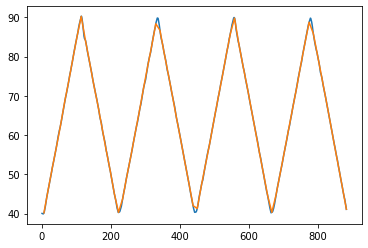

In [10]:
t_data = pd.read_csv(r'C:\Users\Meagan\Documents\thermal melting\myoglobin\201119\\2020-11-19_tempdata_55_12.txt', delimiter = '\t')
#t_data[:10]
td = t_data['time_elasped']
Td = t_data['read_temp']

func = interp1d(td, Td)
times = np.arange(0.1,14.9, 0.2)
times*=60
ynew = func(times)
plt.plot(td, Td)
plt.plot(times, ynew)

drops = []
for i in np.arange(0, len(td)-1):
    if td[i+1]>td[i]+2:
        print(i+1)
        drops.append((i+1))
print(drops)
td.drop(drops, axis = 0, inplace = True)
new_index = np.arange(0, len(td)+1, 1)
td = td.reindex(new_index)

T = []
t = []

    
        
    
#T = np.array(T)
#t = np.array(t)
#l = np.vstack((T, t))      
#df = pd.DataFrame(l.T, columns = ['T', 't'])
#df.drop_duplicates(inplace = True, subset = 't')
#df.reset_index(inplace = True)
#print(df)

In [3]:
MS = []
for f in os.listdir('.'):
    if f.endswith('.txt'):
        
        MS.append(f)
print(np.sort(MS))

['000_mz_0-0.2.txt' '001_mz_0.2-0.4.txt' '002_mz_0.4-0.6.txt'
 '003_mz_0.6-0.8.txt' '004_mz_0.8-1.0.txt' '005_mz_1.0-1.2.txt'
 '006_mz_1.2-1.4.txt' '007_mz_1.4-1.6.txt' '008_mz_1.6-1.8.txt'
 '009_mz_1.8-2.0.txt' '010_mz_2.0-2.2.txt' '011_mz_2.2-2.4.txt'
 '012 -mz_2.4-2.6.txt' '013_mz_2.6-2.8.txt' '014 -mz_2.8-3.0.txt'
 '015 -mz_3.0-3.2.txt' '016 -mz_3.2-3.4.txt' '017 _mz_3.4-3.6.txt'
 '018 _mz_3.6-3.8.txt' '019_mz_3.8-4.0.txt' '020_mz_4.0-4.2.txt'
 '021_mz_4.2-4.4.txt' '022_mz_4.4-4.6.txt' '023_mz_4.6-4.8.txt'
 '024_mz_4.8-5.0.txt' '025_mz_5.0-5.2.txt' '026_mz_5.2-5.4.txt'
 '027_mz_5.4-5.6.txt' '028_mz_5.6-5.8.txt' '029_mz_5.8-6.0.txt'
 '030_mz_6.0-6.2.txt' '031_mz_6.2-6.4.txt' '032_mz_6.4-6.6.txt'
 '033_mz_6.6-6.8.txt' '034_mz_6.8-7.0.txt' '035_mz_7.0-7.2.txt'
 '036_mz_7.2-7.4.txt' '037_mz_7.4-7.6.txt' '038_mz_7.6-7.8.txt'
 '039_mz_7.8-8.0.txt' '040_mz_8..8-9.0.txt' '041_mz_8.0-8.2.txt'
 '042_mz_8.2-8.4.txt' '043_mz_8.4-8.6.txt' '044_mz_8.6-8.8.txt'
 '045_mz_9.0-9.2.txt' '046_mz_9.2-9

In [67]:
## average apo charge states
avgA_cs = []
for i in range(len(MS)):
        CS = []
        ints = []
        print(MS[i])
        data = np.loadtxt(MS[i], delimiter = '\t')
        x = data[:,0]
        #x/=1000
        y = data[:,1]
        y/=np.sum(y)
        
        for j in range(len(b1)):
            l = b1['low'][j]
            h = b1['high'][j]
            mask = (x>=l)&(x<=h)
            cs_intA = np.sum(y[mask])
            ints.append(cs_intA)
            CS.append(np.round(b1['CS'][j], 1))
        
        avg = np.average(CS, weights = ints)
        print(avg,' : average CS')
        #adding to overall list
        avgA_cs.append(avg)

000_mz_0-0.2.txt
11.386070706360032  : average CS
001_mz_0.2-0.4.txt
11.542958497214988  : average CS
002_mz_0.4-0.6.txt
11.56593278640009  : average CS
003_mz_0.6-0.8.txt
11.392047513589691  : average CS
004_mz_0.8-1.0.txt
11.49446082846954  : average CS
005_mz_1.0-1.2.txt
11.543427001101525  : average CS
006_mz_1.2-1.4.txt
11.853906717620518  : average CS
007_mz_1.4-1.6.txt
11.940475623047762  : average CS
008_mz_1.6-1.8.txt
12.193832270117854  : average CS
009_mz_1.8-2.0.txt
12.241418784046715  : average CS
010_mz_2.0-2.2.txt
12.278317624402476  : average CS
011_mz_2.2-2.4.txt
12.20798973192347  : average CS
012 -mz_2.4-2.6.txt
12.164760964087497  : average CS
013_mz_2.6-2.8.txt
12.059190619728225  : average CS
014 -mz_2.8-3.0.txt
11.94693203313107  : average CS
015 -mz_3.0-3.2.txt
11.868157809502453  : average CS
016 -mz_3.2-3.4.txt
11.883887790985783  : average CS
017 _mz_3.4-3.6.txt
11.697735727334663  : average CS
018 _mz_3.6-3.8.txt
11.576496222266773  : average CS
019_mz_3.8-4

In [68]:
## average holo charge states
#need to boolean slice out bound fucking idiot
avgH_cs = []
for i in range(len(MS)):
        CS = []
        ints = []
        data = np.loadtxt(MS[i], delimiter = '\t')
        x = data[:,0]
        #x/=1000
        y = data[:,1]
        y/=np.sum(y)
        
        
        for k in range(len(b2)):
            l = (b2['low'][k]) #low bound for sum
            h = (b2['high'][k]) #high bound for sum
       
            mask = (x >l) & (x<h)
         
            cs_intH = np.sum(y[mask])
            
            ints.append(cs_intH)
            CS.append((np.round(b2['CS'][k])))
        
        #average charge state for each file, 
        avg = np.average(CS, weights = ints)
        print(avg,' : average CS')
        #adding to overall list
        avgH_cs.append(avg)

8.719949278878715  : average CS
8.71080575795551  : average CS
8.714721731027044  : average CS
8.741615079922623  : average CS
8.791153409759199  : average CS
8.813098016849024  : average CS
8.855742121859167  : average CS
8.902583380993537  : average CS
9.168617698465788  : average CS
9.519413098804563  : average CS
9.252188096695326  : average CS
9.061363701973018  : average CS
8.981608905254358  : average CS
8.928091743119264  : average CS
8.901314715930292  : average CS
8.8854058133732  : average CS
8.87648501016543  : average CS
8.873263554618912  : average CS
8.843739794211174  : average CS
8.877542450834778  : average CS
8.883829491869024  : average CS
8.932987499800538  : average CS
8.931388387834348  : average CS
8.943569281401588  : average CS
8.935323095742136  : average CS
8.97412429378531  : average CS
9.016512125012301  : average CS
9.781346380839967  : average CS
9.737233724051697  : average CS
9.220501117515587  : average CS
8.917958201861838  : average CS
8.89701207106

In [69]:
avg_cs = []

for i in range(len(MS)):
        CS = []
        ints = []
        #print(MS[i])
        data = np.loadtxt(MS[i], delimiter = '\t')
        x = data[:,0]
        #x/=1000
        y = data[:,1]
        y/=np.sum(y)
       
    #apo data
        for j in range(len(b1)):
            l = b1['low'][j]
            h = b1['high'][j]
            mask = (x>=l)&(x<=h)
            cs_intA = np.sum(y[mask])
            #print(cs_intA, np.round(b1['CS'][j], 1))
            ints.append(cs_intA)
            CS.append(np.round(b1['CS'][j], 1))
    
    #holo data
        for k in range(len(b2)):
            l = b2['low'][k]
            h = b2['high'][k]
            mask = (x>=l)&(x<=h)
            cs_intH = np.sum(y[mask])
            ints.append(cs_intH)
            CS.append((np.round(b2['CS'][k])))
       
    
        #average charge state for each file, 
        avg = np.average(CS, weights = ints)
        print(avg,' : average CS')
        #adding to overall list
        avg_cs.append(avg)
        
#print(avg_cs)

9.018121477405263  : average CS
8.928928245726274  : average CS
8.92914775610936  : average CS
8.965873114566715  : average CS
9.013420298071477  : average CS
9.035874186515438  : average CS
9.147504461228959  : average CS
9.284414838020922  : average CS
10.39588879869089  : average CS
11.568757686964442  : average CS
11.15502240901329  : average CS
10.377876187550713  : average CS
9.803270433449567  : average CS
9.503365608853539  : average CS
9.394567142170116  : average CS
9.32045440753065  : average CS
9.304121123957175  : average CS
9.274705970188585  : average CS
9.226294627894902  : average CS
9.268840080050596  : average CS
9.268000076784402  : average CS
9.351775206086494  : average CS
9.324801405703726  : average CS
9.331276966834908  : average CS
9.273973762644511  : average CS
9.38254048572993  : average CS
9.979213011970211  : average CS
11.837574513664846  : average CS
11.650887963903921  : average CS
10.879354551569085  : average CS
9.769637189530135  : average CS
9.4729

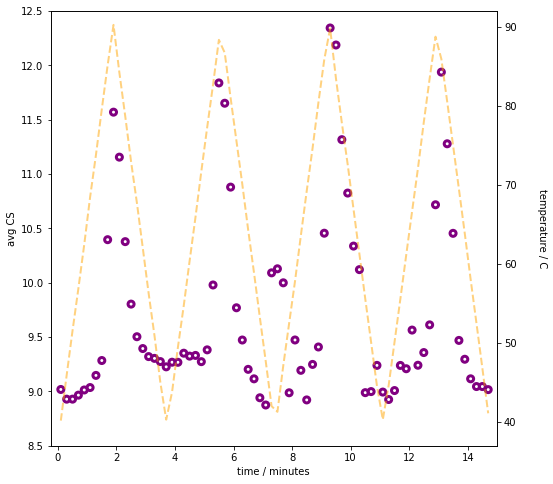

In [95]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = (8,8))
ax1 = ax.twinx()
color = mpl.cm.winter(np.linspace(0, 1, len(ynew)))

ax.scatter(times/60, avg_cs, color = 'purple', marker = 'o', facecolor = 'none', lw = 3)

ax1.plot(times/60, ynew, color = 'orange', linestyle = '--', lw = 2, alpha = 0.5)
ax.set_ylabel('avg CS')
ax.set_xlabel('time / minutes')
ax.set_xlim(-.25, 15)
ax.set_xticks(np.arange(0,16,2))


ax.set_yticks(np.arange(8.5,13,.5))
ax.set_ylim(8.5,12.5)

ax1.set_yticks(np.arange(40,100,10))
ax1.set_ylim(37,92)


ax1.set_ylabel('temperature / C', rotation = 270)
ax1.yaxis.labelpad =30
ax.set_yticks(np.arange(8.5,13,.5))
plt.savefig('avg_CS.pdf', format = 'pdf')
plt.show()

000_myoglobin


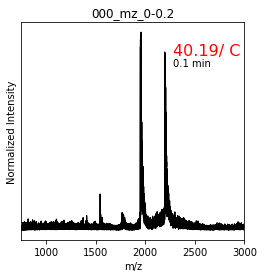

001_myoglobin


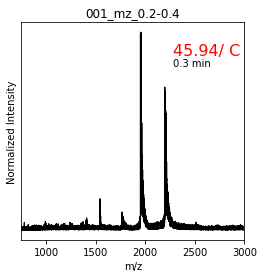

002_myoglobin


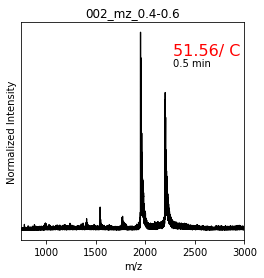

003_myoglobin


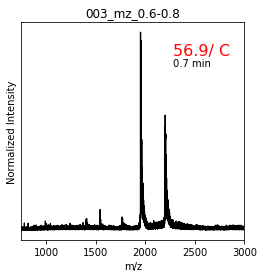

004_myoglobin


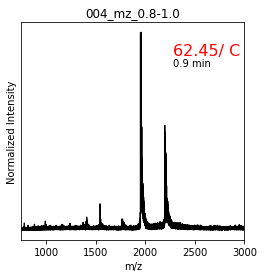

005_myoglobin


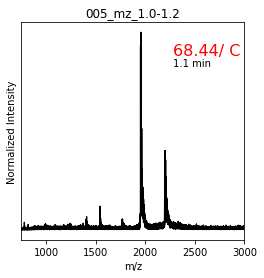

006_myoglobin


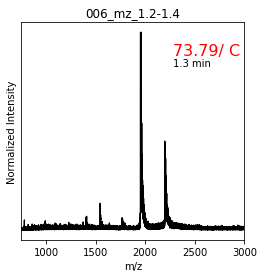

007_myoglobin


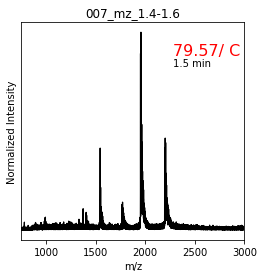

008_myoglobin


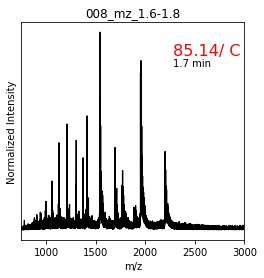

009_myoglobin


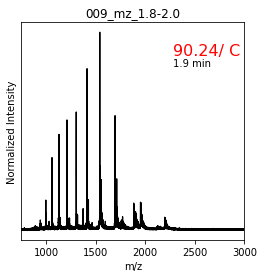

010_myoglobin


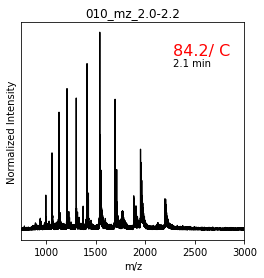

011_myoglobin


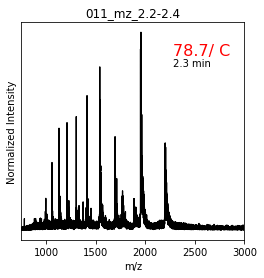

012_myoglobin


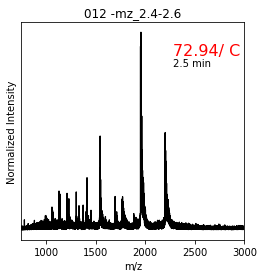

013_myoglobin


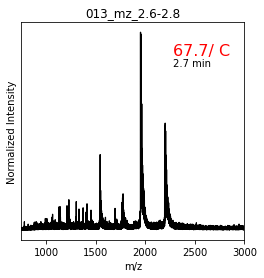

014_myoglobin


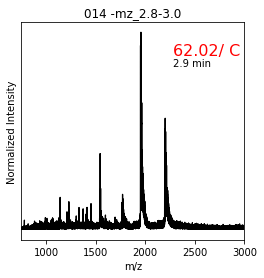

015_myoglobin


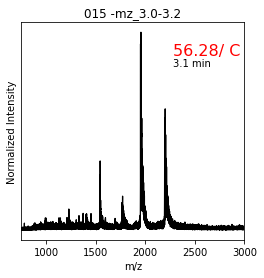

016_myoglobin


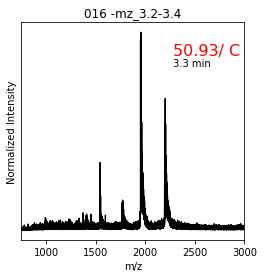

017_myoglobin


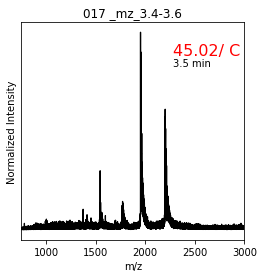

018_myoglobin


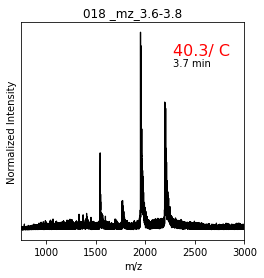

019_myoglobin


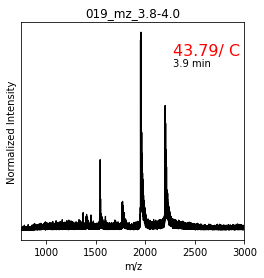

020_myoglobin


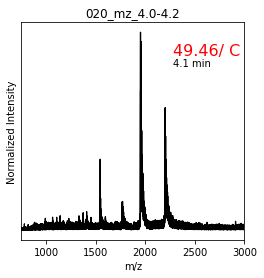

021_myoglobin


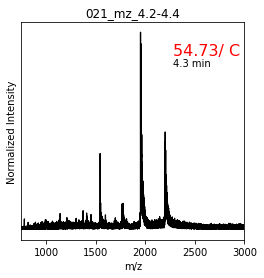

022_myoglobin


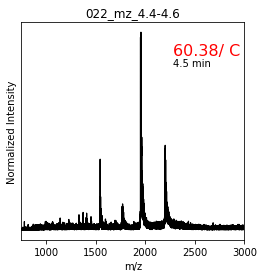

023_myoglobin


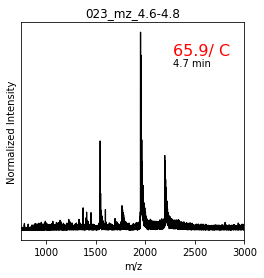

024_myoglobin


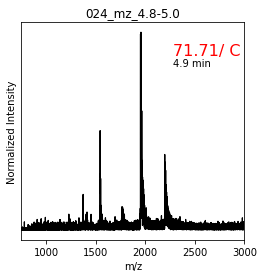

025_myoglobin


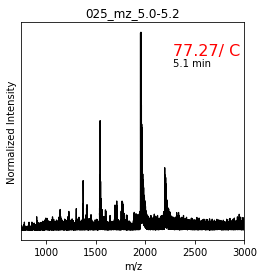

026_myoglobin


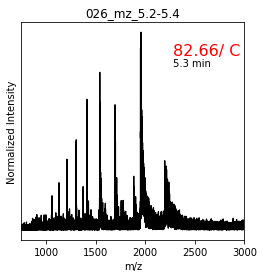

027_myoglobin


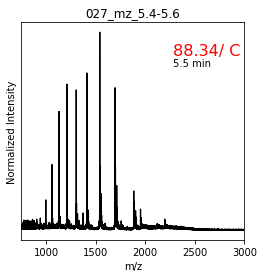

028_myoglobin


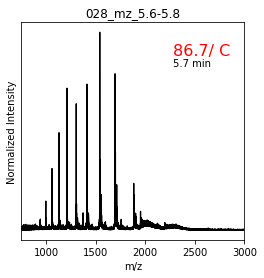

029_myoglobin


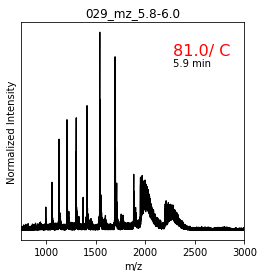

030_myoglobin


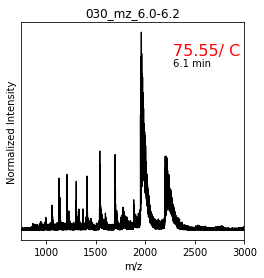

031_myoglobin


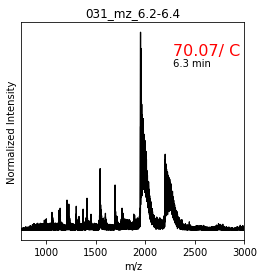

032_myoglobin


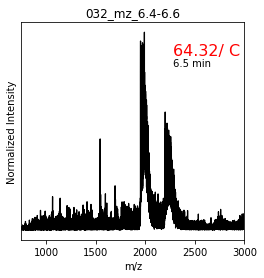

033_myoglobin


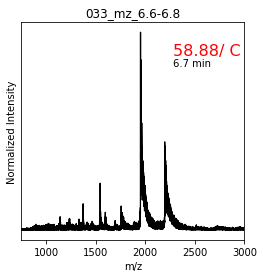

034_myoglobin


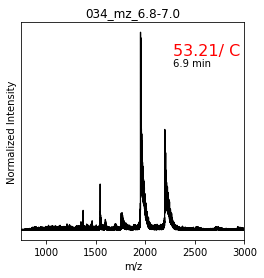

035_myoglobin


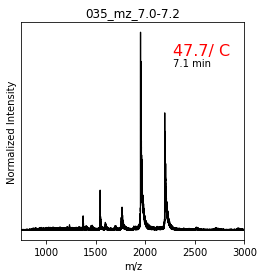

036_myoglobin


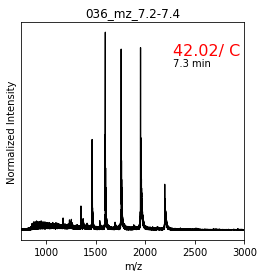

037_myoglobin


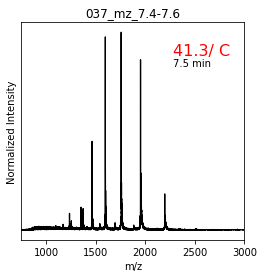

038_myoglobin


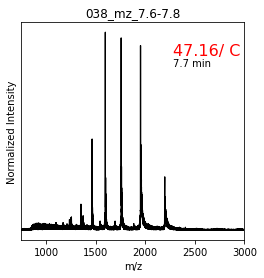

039_myoglobin


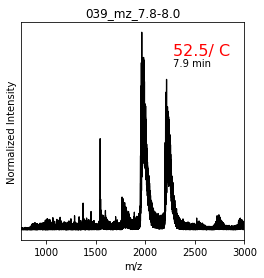

040_myoglobin


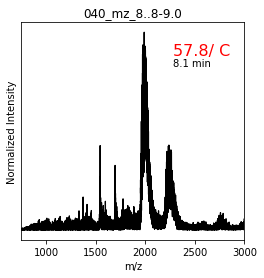

041_myoglobin


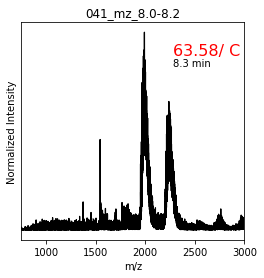

042_myoglobin


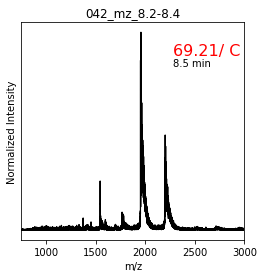

043_myoglobin


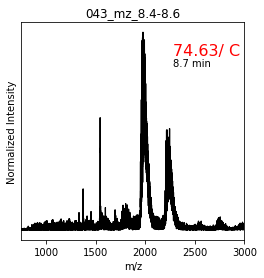

044_myoglobin


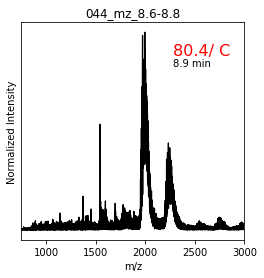

045_myoglobin


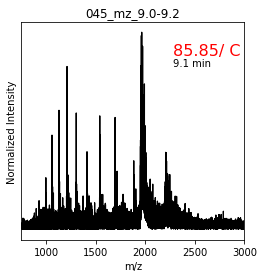

046_myoglobin


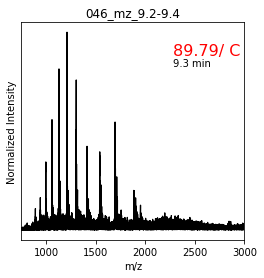

047_myoglobin


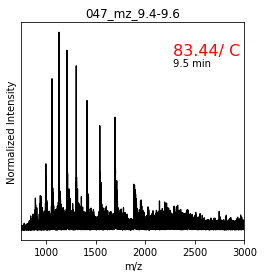

048_myoglobin


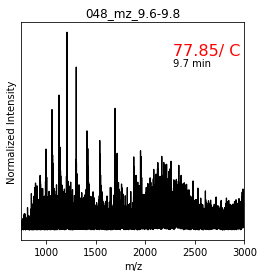

049_myoglobin


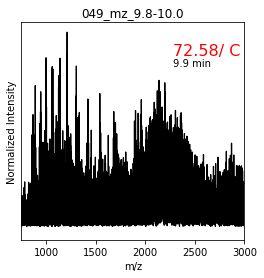

050_myoglobin


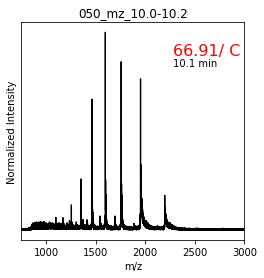

051_myoglobin


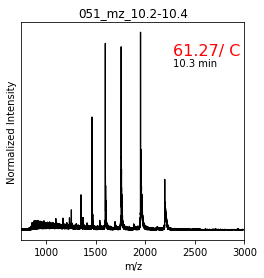

052_myoglobin


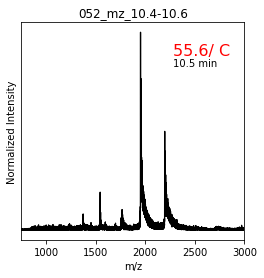

053_myoglobin


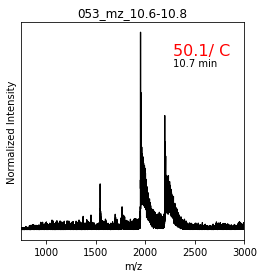

054_myoglobin


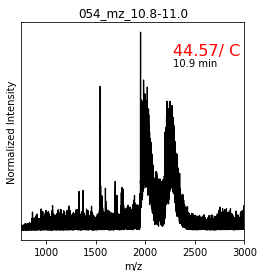

055_myoglobin


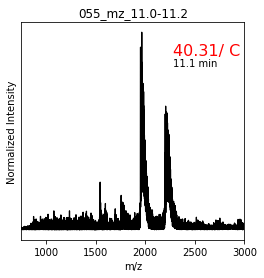

056_myoglobin


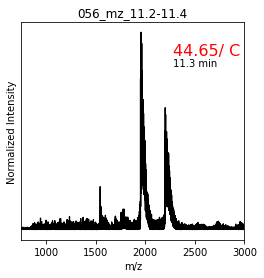

057_myoglobin


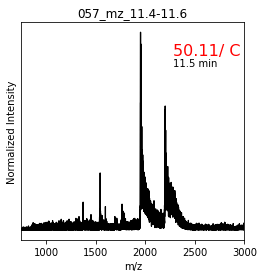

058_myoglobin


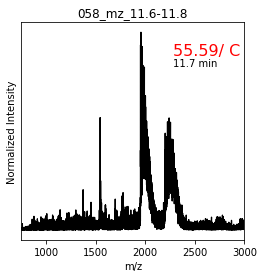

059_myoglobin


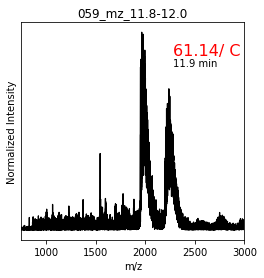

060_myoglobin


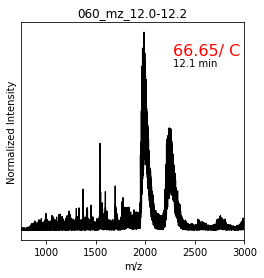

061_myoglobin


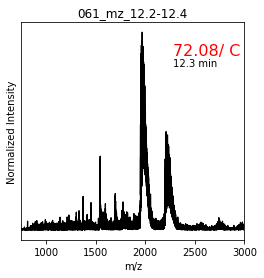

062_myoglobin


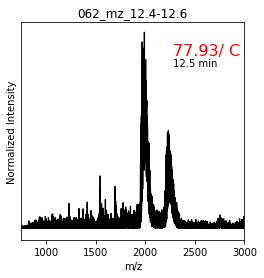

063_myoglobin


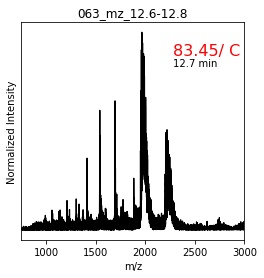

064_myoglobin


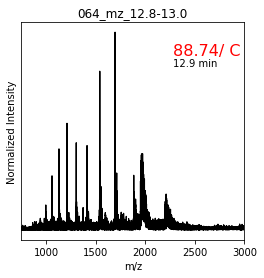

065_myoglobin


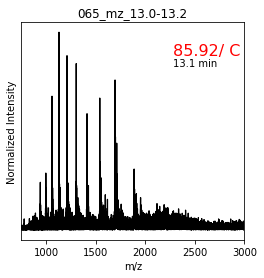

066_myoglobin


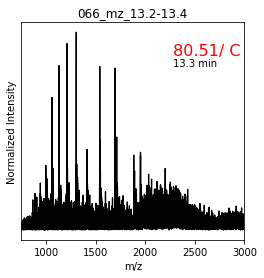

067_myoglobin


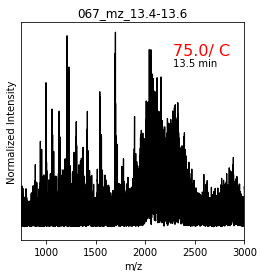

068_myoglobin


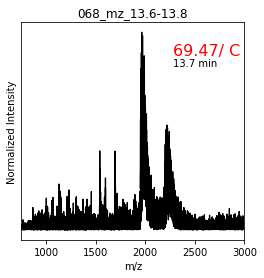

069_myoglobin


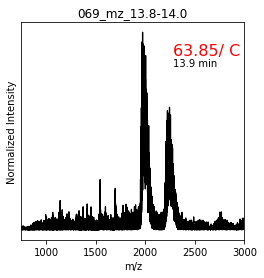

070_myoglobin


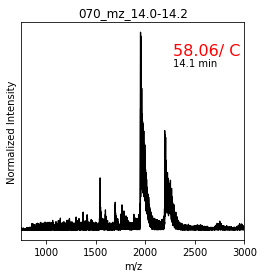

071_myoglobin


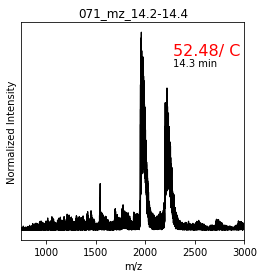

072_myoglobin


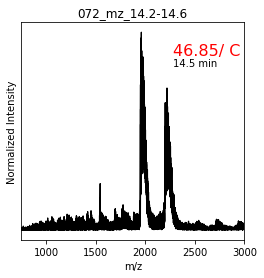

073_myoglobin


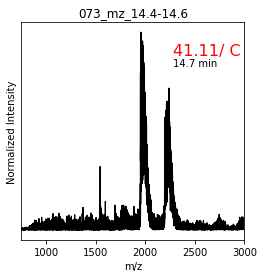

In [45]:

x_min = 1.65
x_max = 1.75

color = mpl.cm.Wistia(np.linspace(0.2, 1, len(MS)))
window_size, poly_order = 7,1 #always use a poly order of 1, window size dictates how much smoothing is done
labels = ['ESI', 'TENG']

for i in range(len(MS)):
        fig, ax1 = plt.subplots(figsize = (4,4))
       
        data = np.loadtxt(MS[i], delimiter = '\t')
        x = data[:,0]
        #x/=1000
        y = data[:,1]
        y/=np.sum(y)
        
        #x_masked = ma.masked_where(x<1.65, x)
        #x_masked = ma.masked_where(x_masked>1.75, x_masked)
     
        
        #Interpolate
        #interp1d uses interplolation to find a function relating x to y to find new points
        itp = interp1d(x,y)
        #smooth the data
        print('{}_myoglobin'.format(str(i).zfill(3)))
        #apply the interplolated function to x data
        yy_sg = savgol_filter(itp(x), window_size, poly_order)
        ax1.plot(x,yy_sg, linewidth = 1.25, color = 'k')
        ax1.set_xlabel('m/z')
        ax1.set_ylabel('Normalized Intensity')
        ax1.set_yticks([])
        ax1.set_xlim(750,3000)
        ax1.set_title('{}'.format(MS[i][:-4]))
        ax1.text(0.68, 0.85, '{}/ C'.format(np.round(ynew[i], 2)), fontsize = 16, color = 'r',transform=ax1.transAxes) 
        ax1.text(0.68, 0.8, '{} min'.format(np.round(times[i]/60, 3)), color = 'k', transform=ax1.transAxes)
        plt.savefig('{}_1119_myoglobin.png'.format(str(i).zfill(3)), format = 'png')
        plt.savefig('{}_1119_myoglobin.pdf'.format(str(i).zfill(3)), format = 'pdf')
        plt.show()
        # zoom for inset
        #ax2 = axs.inset_axes([1.65,10000, 0.3, 5000], transform = axs.transData)
        #ax2.plot(x_masked, yy_sg, linewidth = 1.25, color = cm((i+0.1)/0.5))
        #ax2.set_xlim(x_min, x_max)
        #axins.set_xlim(x1, x2)
        #axins.set_ylim(y1, y2)
        #axins.set_xticklabels('')
        #axins.set_yticklabels('')

        
       
#ax1.set_xlim(5000,6600)
#ax1.set_xticks(np.arange(5000,6700,200))
#ax1.legend()
#ax2.set_yticks([])

#lt.savefig('ADH_200813.pdf', format = 'pdf')
#plt.savefig('ADH_2.png', format ='png')

